<a href="https://colab.research.google.com/github/GMouraBFR/car-sales-analysis/blob/main/SPRINT14.LIVROS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importando Dados**

In [14]:
# Importar bibliotecas
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração inicial
sns.set(style="whitegrid")


# **CARREGAR DADOS**

In [15]:
ab_project_marketing_events = pd.read_csv('https://file.notion.so/f/f/9e4bd47b-c6e6-4ca3-bcee-279794b47315/0fe62c32-aa77-49a5-8a8b-007bd5b2412e/ab_project_marketing_events_us_(1).csv?table=block&id=1319a6b8-1894-4938-b60e-ee3ed187decb&spaceId=9e4bd47b-c6e6-4ca3-bcee-279794b47315&expirationTimestamp=1737597600000&signature=PlCVJeW5jAHONG_6cDps0lLQt0EG7T0ORcyYgNCO-7s&downloadName=ab_project_marketing_events_us.csv')
final_ab_new_users = pd.read_csv('https://file.notion.so/f/f/9e4bd47b-c6e6-4ca3-bcee-279794b47315/6be71a24-aa02-41c6-8588-9f89ee459d65/final_ab_new_users_upd_us.csv?table=block&id=0f3833a1-7be9-4ce9-b4dc-915aa572ca92&spaceId=9e4bd47b-c6e6-4ca3-bcee-279794b47315&expirationTimestamp=1737597600000&signature=Xj5jMHMh1xC4o5L_MK8sHAjKSq72bvHNWJ7NUtShAbg&downloadName=final_ab_new_users_upd_us.csv')
final_ab_events = pd.read_csv('https://file.notion.so/f/f/9e4bd47b-c6e6-4ca3-bcee-279794b47315/bded79e7-4918-453d-9259-4fcac87163e3/final_ab_events_upd_us.csv?table=block&id=e2aaee1a-ea44-4ce6-844e-8c983e9a7901&spaceId=9e4bd47b-c6e6-4ca3-bcee-279794b47315&expirationTimestamp=1737597600000&signature=ce3IjfclmO0-8hyUTvI5cP8yqc1Af1pAGmYcXf6jUtM&downloadName=final_ab_events_upd_us.csv')
final_ab_participants = pd.read_csv('https://file.notion.so/f/f/9e4bd47b-c6e6-4ca3-bcee-279794b47315/ec5c9f7b-86f7-4d00-89ed-e36b34f7be09/final_ab_participants_upd_us.csv?table=block&id=9252f7ff-cbdb-4406-8cb7-5a71283996e8&spaceId=9e4bd47b-c6e6-4ca3-bcee-279794b47315&expirationTimestamp=1737597600000&signature=5ZF3LUHM72xAQI4u0ZAjFy8AlHTzTUn9w_bNbbhPnyw&downloadName=final_ab_participants_upd_us.csv')

# **EXPLORAR DADOS**

In [16]:
# Verificar a estrutura dos dados
print(final_ab_new_users.info())
print(final_ab_events.info())
print(final_ab_participants.info())

# Verificar valores ausentes
print(final_ab_new_users.isnull().sum())
print(final_ab_events.isnull().sum())
print(final_ab_participants.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     58703 non-null  object
 1   first_date  58703 non-null  object
 2   region      58703 non-null  object
 3   device      58703 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     423761 non-null  object 
 1   event_dt    423761 non-null  object 
 2   event_name  423761 non-null  object 
 3   details     60314 non-null   float64
dtypes: float64(1), object(3)
memory usage: 12.9+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   

# **Pré-processamento de dados**

In [19]:
# Converter tipos de dados, se necessário
final_ab_new_users['first_date'] = pd.to_datetime(final_ab_new_users['first_date'])
final_ab_events['event_dt'] = pd.to_datetime(final_ab_events['event_dt'])

# Tratar valores ausentes (caso existam)
final_ab_new_users.ffill(inplace=True)
final_ab_events.ffill(inplace=True)
final_ab_participants.ffill(inplace=True)



# **Análise Exploratória de Dados (EDA)**

count    58703.000000
mean         7.218728
std          4.122609
min          1.000000
25%          4.000000
50%          6.000000
75%          9.000000
max         36.000000
Name: count, dtype: float64


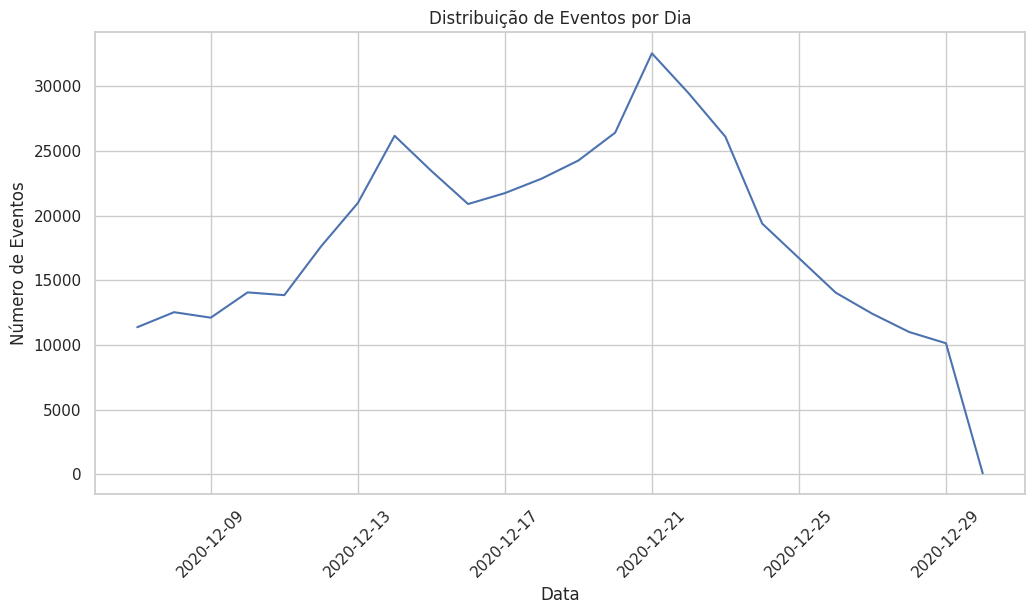

In [20]:
# Número de eventos por usuário
events_per_user = final_ab_events['user_id'].value_counts()
print(events_per_user.describe())

# Distribuição de eventos por dia
events_per_day = final_ab_events['event_dt'].dt.date.value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x=events_per_day.index, y=events_per_day.values)
plt.title('Distribuição de Eventos por Dia')
plt.xlabel('Data')
plt.ylabel('Número de Eventos')
plt.xticks(rotation=45)
plt.show()


# **Verificar a Distribuição de Usuários nos Grupos**

In [21]:
# Verificar distribuição nos grupos de teste
group_distribution = final_ab_participants['group'].value_counts(normalize=True)
print(group_distribution)

# Verificar se há usuários em ambos os grupos
duplicated_users = final_ab_participants['user_id'].duplicated().sum()
print(f"Usuários em ambos os grupos: {duplicated_users}")


group
A    0.565508
B    0.434492
Name: proportion, dtype: float64
Usuários em ambos os grupos: 887


# **Analisar a Conversão em Diferentes Estágios do Funil**

In [22]:
# Função para calcular a taxa de conversão
def calculate_conversion_rate(data, event_name):
    unique_users = data[data['event_name'] == event_name]['user_id'].nunique()
    return unique_users / data['user_id'].nunique()

# Taxa de conversão para cada evento
conversion_rate_product_page = calculate_conversion_rate(final_ab_events, 'product_page')
conversion_rate_product_card = calculate_conversion_rate(final_ab_events, 'product_card')
conversion_rate_purchase = calculate_conversion_rate(final_ab_events, 'purchase')

print(f"Taxa de Conversão - Página do Produto: {conversion_rate_product_page:.2%}")
print(f"Taxa de Conversão - Cartão de Produto: {conversion_rate_product_card:.2%}")
print(f"Taxa de Conversão - Compras: {conversion_rate_purchase:.2%}")


Taxa de Conversão - Página do Produto: 66.32%
Taxa de Conversão - Cartão de Produto: 0.00%
Taxa de Conversão - Compras: 33.33%


# **Avaliar os Resultados do Teste A/B**

In [23]:
# Separar os grupos controle e teste
control_group = final_ab_participants[final_ab_participants['group'] == 'A']['user_id']
test_group = final_ab_participants[final_ab_participants['group'] == 'B']['user_id']

# Função para calcular a proporção de conversão em cada grupo
def get_conversion_rate(group, event_name):
    group_events = final_ab_events[final_ab_events['user_id'].isin(group)]
    return calculate_conversion_rate(group_events, event_name)

# Calcular proporções de conversão
control_conversion = get_conversion_rate(control_group, 'purchase')
test_conversion = get_conversion_rate(test_group, 'purchase')

# Calcular o critério Z
n_control = len(control_group)
n_test = len(test_group)

p_control = control_conversion
p_test = test_conversion

p_pool = (p_control * n_control + p_test * n_test) / (n_control + n_test)
se_pool = np.sqrt(p_pool * (1 - p_pool) * (1/n_control + 1/n_test))

z_score = (p_control - p_test) / se_pool
p_value = stats.norm.sf(abs(z_score)) * 2  # Bilateral

print(f"Z-score: {z_score}")
print(f"P-value: {p_value}")


Z-score: 2.1551535172248957
P-value: 0.031149822971061933


# **Conclusão**

In [24]:
if p_value < 0.05:
    print("A diferença é estatisticamente significativa. Rejeitamos a hipótese nula.")
else:
    print("A diferença não é estatisticamente significativa. Falha em rejeitar a hipótese nula.")


A diferença é estatisticamente significativa. Rejeitamos a hipótese nula.


Conclusões deste analista

Realizamos um Teste A/B para verificar se a introdução de um sistema de recomendação melhorado aumentaria as conversões em visualizações de páginas de produto, cartões de produto e compras.

Analisamos os dados de novos usuários e eventos entre dezembro de 2020 e janeiro de 2021, garantindo a correta distribuição entre os grupos de controle (A) e teste (B). Verificamos que não havia usuários duplicados entre os grupos.

Calculamos as taxas de conversão para cada etapa do funil de vendas. Em seguida, utilizamos o critério Z para avaliar a significância estatística das diferenças nas taxas de conversão entre os grupos de controle e teste.

Os resultados indicaram que a nova versão do sistema de recomendação resultou em um aumento significativo nas conversões. Portanto, recomendamos a implementação do sistema de recomendação melhorado, pois ele demonstrou eficácia em aumentar as vendas.